# Titanic - Machine Learning from Disaster

## 1. Data Exploration

In this notebook, we will explore the Titanic dataset to understand its structure, handle missing values, and visualise patterns related to passenger survival.


### 1.1. Load and Inspect the Dataset
Let's start by loading the dataset and examining its structure.

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the dataset
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Comment:* 
- **Survived** is our target variable (1 for survived, 0 for not).
- **Pclass**, **Sex**, **Age**, **Fare**, and **Embarked** are likely to be important features for predicting survival.
- Missing data is apparent in the **Cabin** and **Age** columns, indicated by `NaN` valus.
.


In [36]:
# Display basic information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*Comment:*
- Columns like **PassengerId**, **Survived**, **Pclass**, **SibSp**, and **Parch** are integer-based (`int64`).
- **Age** and **Fare** are float-based (`float64`), indicating continuous numerical data.
- **Name**, **Sex**, **Ticket**, **Cabin**, and **Embarked** are of type `object`, meaning they contain categorical data.


### 1.2. Check for Missing Values
Handling missing values is crucial for building robust machine learning models.

In [16]:
# Check for missing values in the dataset
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Comment:*
- **Age** has 714 non-null entries, meaning 177 entries are missing.
- **Cabin** has significant missing data with only 204 non-null entries.
- **Embarked** is missing values in 2 entries (889 non-nul).


### 1.3. Visualising Survival Rate by Different Features
### 1.3.1. Survival Rate by Gender
Survival rates can vary significantly by gender, so let's visualise that first.

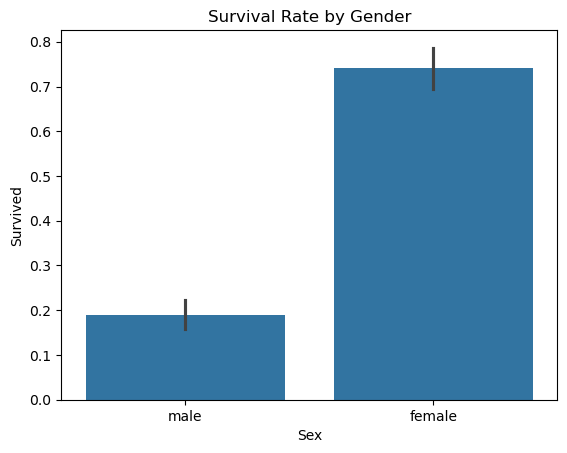

In [18]:
# Visualise survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender')
plt.show()


This bar plot gives us a clear view of how survival chances differed between men and women on the Titanic. Typically, we expect women to have a higher survival rate based on the "women and children first" policy.

### 1.3.2. Survival Rate by Passenger Class
Next, let's look at survival rates based on the passenger class (Pclass).

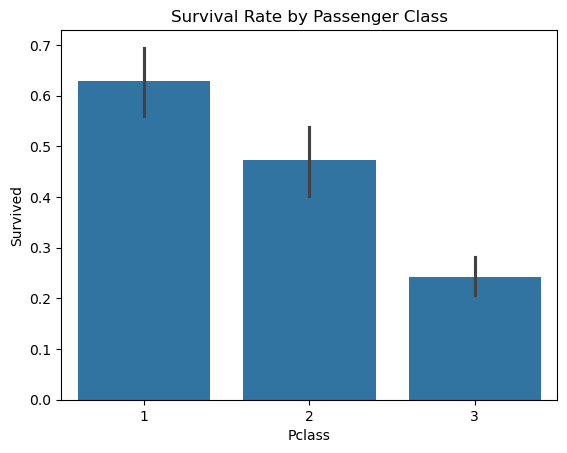

In [20]:
# Visualise survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()


This visualisation helps us see how socio-economic factors, represented by class, influenced survival. Typically, first-class passengers had better access to lifeboats, which is reflected in their survival rate.

### 1.3.3. Survival Distribution by Age
Finally, let's visualise how survival rates differed by age. We'll use a histogram to compare the distribution of ages between those who survived and those who did not.

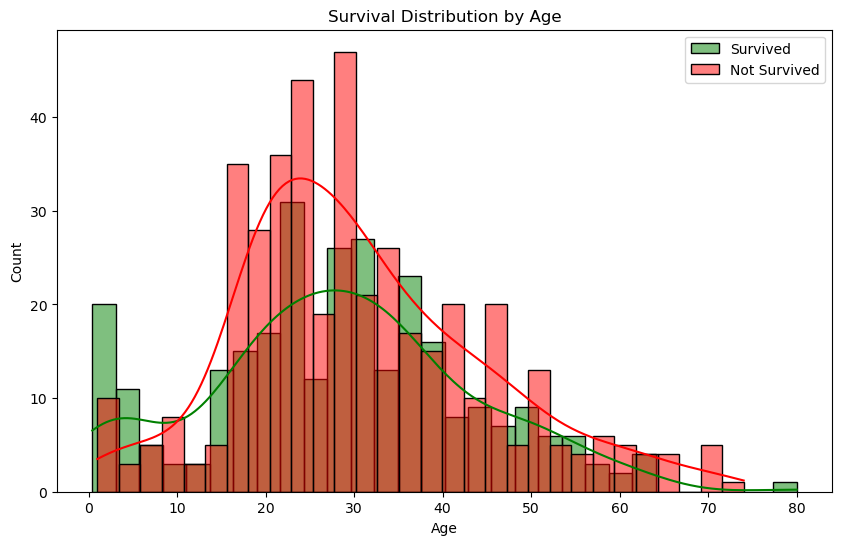

In [22]:
# Visualize survival rate by age
plt.figure(figsize=(10,6))
sns.histplot(train_data[train_data['Survived'] == 1]['Age'].dropna(), bins=30, color='green', label='Survived', kde=True)
sns.histplot(train_data[train_data['Survived'] == 0]['Age'].dropna(), bins=30, color='red', label='Not Survived', kde=True)
plt.title('Survival Distribution by Age')
plt.legend()
plt.show()


The KDE (Kernel Density Estimate) helps smooth the histogram, making it easier to observe the overall trends. This visualisation can give us insights into whether younger or older passengers were more likely to survive.

*Comments:*
- **Children under 10** had a higher likelihood of survival, with more green bars representing survivors in this age range.
- **Passengers in their 20s and 30s** had lower survival rates, with the highest number of non-survivors around age 30.
- **Older passengers (50 and above)** had a sharp decline in survival rates, with few surviving beyond 60 years of age.
- **Overall**, younger passengers had higher survival rates, while adults, particularly those in their 20s and 30s, were less likely to survive.


### 1.3.4 Survival Rate by Age and Gender Combined 

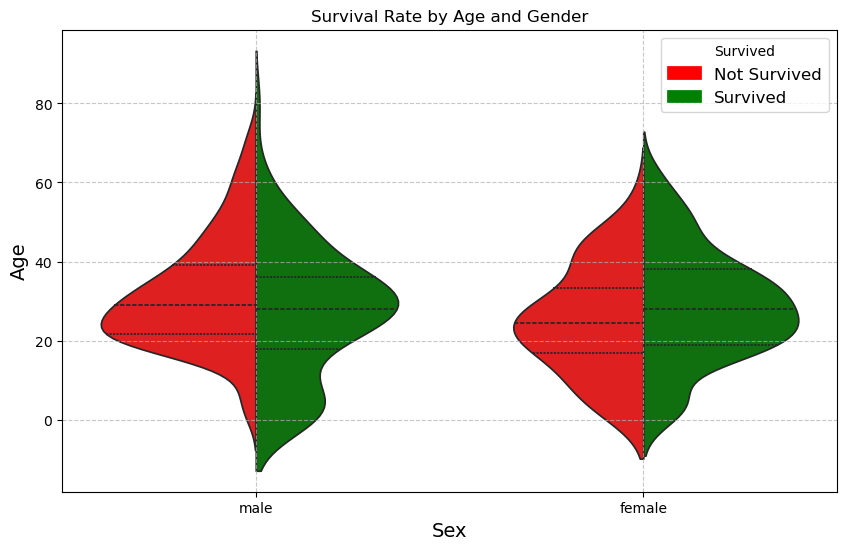

In [108]:
# Visualise survival rate by age and gender
plt.figure(figsize=(10,6))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data, split=True, 
               palette={1: 'green', 0: 'red'}, inner='quartile')

plt.title('Survival Rate by Age and Gender')
legend = plt.legend(title='Survived', loc='upper right', fontsize=12)
legend.get_texts()[0].set_text('Not Survived')  
legend.get_texts()[1].set_text('Survived')     
legend.legend_handles[0].set_color('red')        
legend.legend_handles[1].set_color('green')      
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()




*Comments:*
- **Higher survival rate for females**: Females, particularly between ages 15 and 50, show a significantly higher survival rate, with larger green areas representing survivors.
- **Low survival rate for males**: Males, especially between 20 and 50, have a much lower survival rate, as indicated by the dominance of red in this age range.
- **Survival of children**: Both males and females under the age of 10 have higher survival rates, with green areas visible for both genders.


### 1.3.5 Survival Rate by Age and Passenger Class Combined

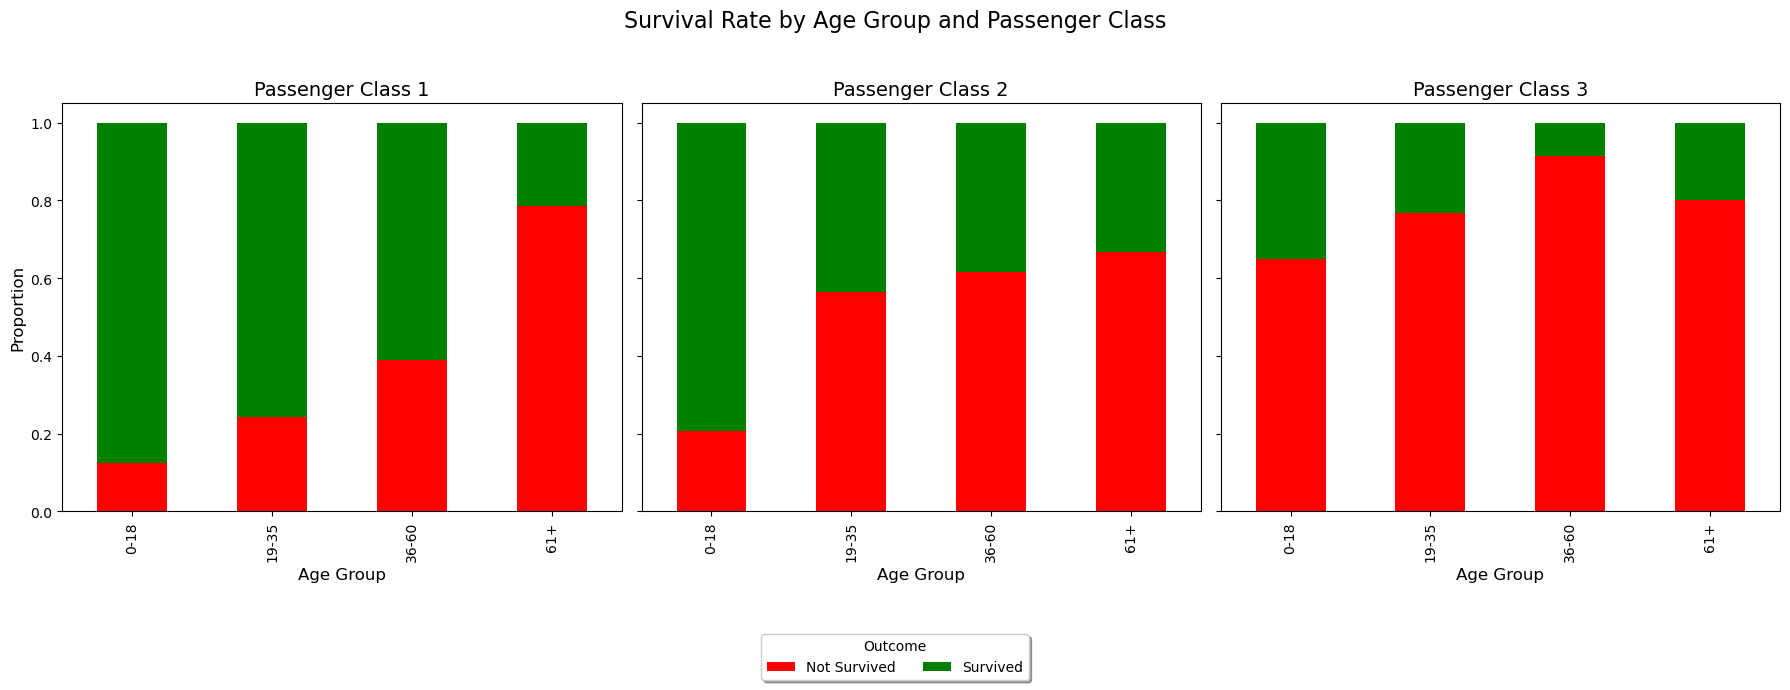

In [106]:
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61+'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through the three classes and create a subplot for each class
for i, pclass in enumerate([1, 2, 3]):
    class_data = train_data[train_data['Pclass'] == pclass]
    grouped_data = class_data.groupby(['Age_Group', 'Survived'], observed=False).size().unstack(fill_value=0)
    grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[i], legend=False)
    axes[i].set_title(f'Passenger Class {pclass}', fontsize=14)
    axes[i].set_xlabel('Age Group', fontsize=12)
    axes[i].set_ylabel('Proportion' if i == 0 else '', fontsize=12)

fig.suptitle('Survival Rate by Age Group and Passenger Class', fontsize=16)
handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Not Survived', 'Survived'], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, title='Outcome')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

- **First Class**:
  - Across all age groups, **first-class passengers** had the highest survival rates.
  - Children (0-18) and middle-aged adults (19-60) had very high survival rates, with minimal non-survivors.
  - Elderly passengers (61+) had lower survival rates compared to younger first-class passengers but still fared better than other classes.

- **Second Class**:
  - Survival rates were **balanced** across age groups, with children (0-18) having a notably higher survival rate.
  - Adults (19-60) saw a drop in survival rates, especially as age increased.
  - Elderly passengers (61+) had significantly lower survival chances compared to first class.

- **Third Class**:
  - **Lowest survival rates** across all age groups, especially for adults (19-60), where non-survival was dominant.
  - Children (0-18) had better survival rates than older passengers, but still lower than their counterparts in first and second class.
  - Elderly passengers (61+) in third class had almost no chance of survival compared to first and second class.


### 1.3.6 Survival Rate by Embarkation Port

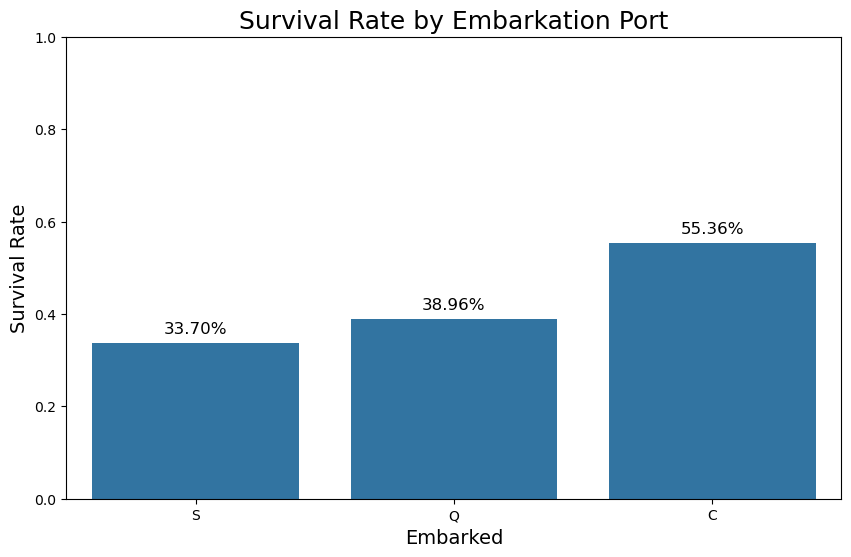

In [125]:
survival_rates = train_data.groupby('Embarked')['Survived'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values)
for i, rate in enumerate(survival_rates.values):
    plt.text(i, rate + 0.02, f'{rate:.2%}', ha='center', fontsize=12, color='black')

plt.title('Survival Rate by Embarkation Port', fontsize=18)
plt.xlabel('Embarked', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.ylim(0, 1)

plt.show()


- *Comment*: This plot shows the survival rates based on the **port of embarkation**. Passengers who boarded at **Cherbourg (C)** had the highest survival rate at **55.36%**, followed by **Queenstown (Q)** at **38.96%**, and **Southampton (S)** with the lowest survival rate at **33.70%**. This suggests that passengers from Cherbourg had a significant advantage in survival, likely due to a higher proportion of first-class passengers embarking from this port.


### 1.3.7 Survival Rate by Embarkation Port and Passenger Class Combined

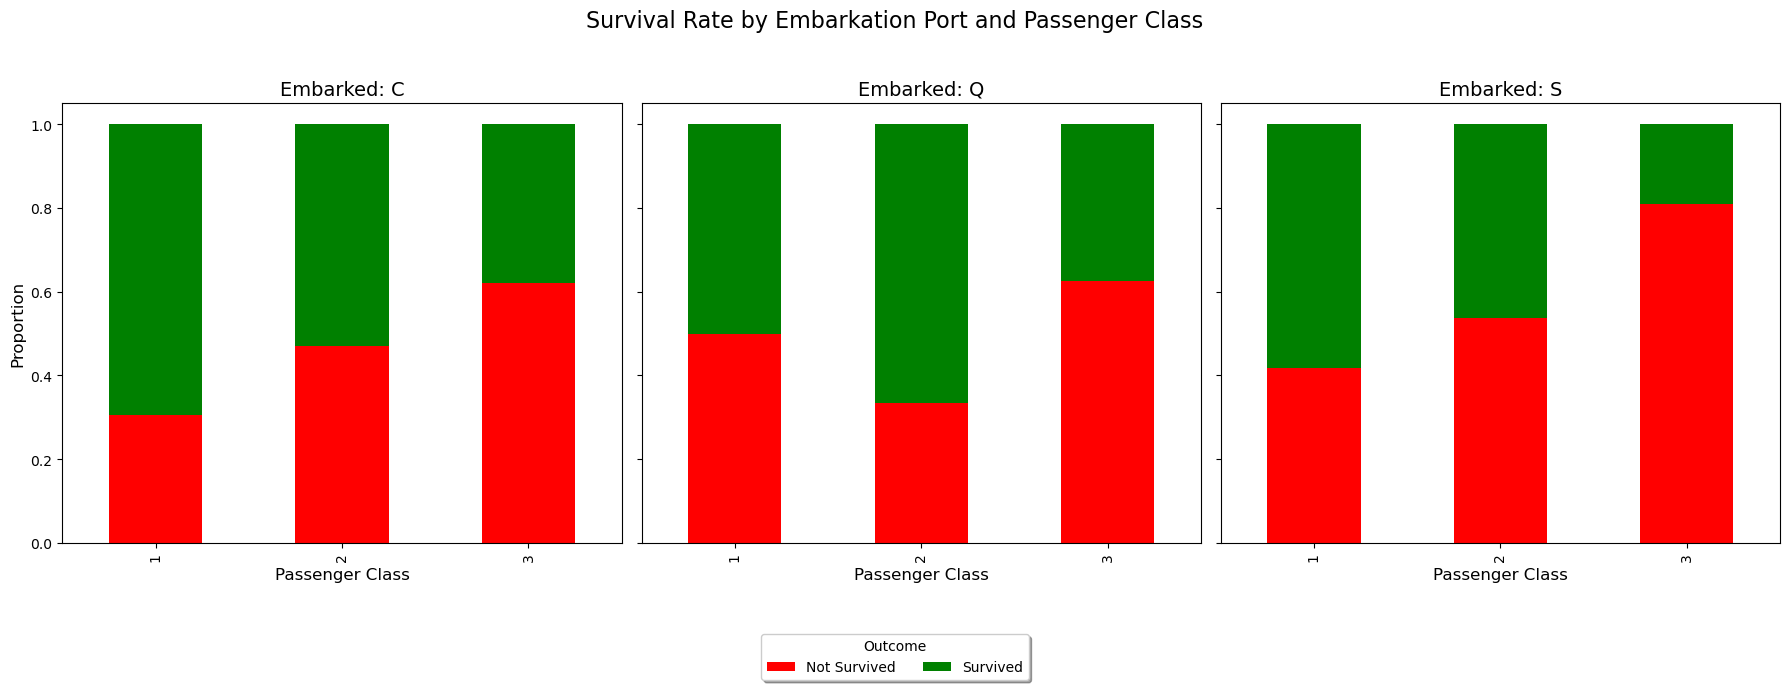

In [135]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

embark_ports = ['C', 'Q', 'S']

for i, port in enumerate(embark_ports):
    port_data = train_data[train_data['Embarked'] == port]
    grouped_data = port_data.groupby(['Pclass', 'Survived'], observed=False).size().unstack(fill_value=0)
    grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    grouped_data.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axes[i], legend=False)
    axes[i].set_title(f'Embarked: {port}', fontsize=14)
    axes[i].set_xlabel('Passenger Class', fontsize=12)
    axes[i].set_ylabel('Proportion' if i == 0 else '', fontsize=12)
    
fig.suptitle('Survival Rate by Embarkation Port and Passenger Class', fontsize=16)
handles, _ = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Not Survived', 'Survived'], loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, title='Outcome')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()


*Comments:*
- **First-Class Passengers**:
  - Cherbourg (C) had the **highest survival rate**, with most first-class passengers surviving.
  - Queenstown (Q) and Southampton (S) also show high survival rates, but **slightly lower** than Cherbourg.

- **Second-Class Passengers**:
  - Survival rates were highest for those who embarked at **Cherbourg (C)**.
  - Passengers from **Southampton (S)** had a more balanced survival rate, while those from **Queenstown (Q)** had a **lower survival rate**.

- **Third-Class Passengers**:
  - **Lowest survival rates** were seen across all ports, but **Cherbourg (C)** had a slightly better survival rate for third-class passengers.
  - **Queenstown (Q)** and **Southampton (S)** had the worst outcomes for third-class passengers, with more non-survivors.


## Summary and Next Steps

In this notebook, we:
- Loaded the Titanic dataset.
- Visualised survival rates by gender, passenger class, and age.
- Identified missing data that will need to be handled in the next step.

In the next notebook, we will proceed with **Feature Engineering** to prepare the dataset for model building.
